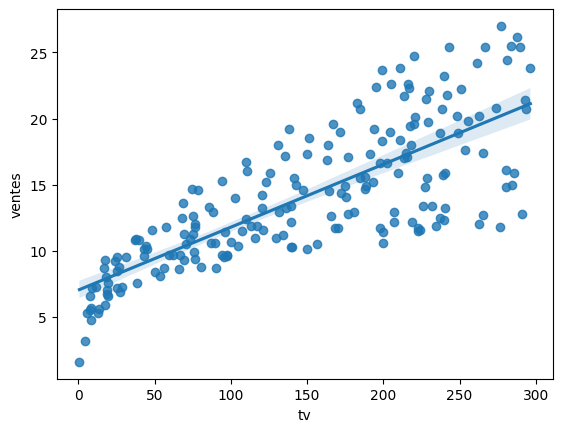

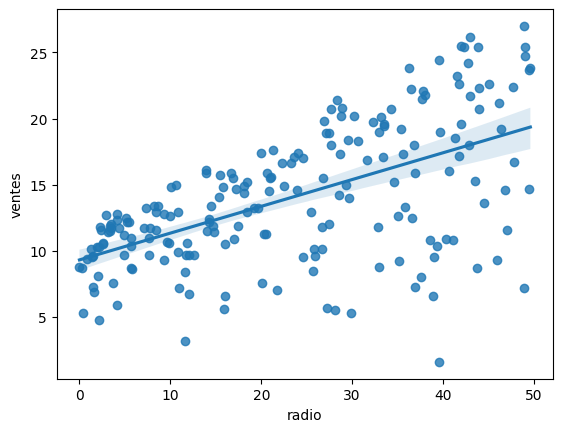

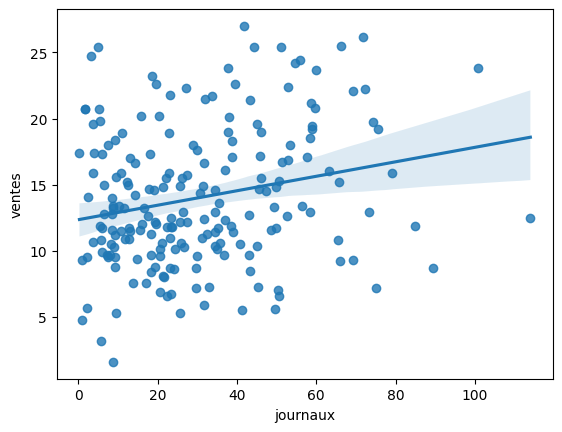

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("advertising.csv")

sns.regplot(x='tv', y='ventes', data=df)
plt.show()
sns.regplot(x='radio', y='ventes', data=df)
plt.show()
sns.regplot(x='journaux', y='ventes', data=df)
plt.show()

Coefficients de corrélation

In [2]:
print(df.corr())

                tv     radio  journaux    ventes
tv        1.000000  0.054809  0.056648  0.782224
radio     0.054809  1.000000  0.354104  0.576223
journaux  0.056648  0.354104  1.000000  0.228299
ventes    0.782224  0.576223  0.228299  1.000000


Ajout d'un terme quadratique (tv^2) et d'un terme croisé (tv*radio)

In [3]:
df['tv2'] = df.tv**2
df['tv_r'] = df.tv*df.radio

Exploration des données

In [4]:
df.head()
df.describe()

,tv,radio,journaux,ventes,tv2,tv_r
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500,28955.591950,3490.309900
std,85.854236,14.846809,21.778621,5.217457,25565.429396,3360.740127
min,0.700000,0.000000,0.300000,1.600000,0.490000,0.000000
25%,74.375000,9.975000,12.750000,10.375000,5531.957500,773.445000
50%,149.750000,22.900000,25.750000,12.900000,22425.065000,2069.065000
75%,218.825000,36.525000,45.100000,17.400000,47884.697500,5516.197500
max,296.400000,49.600000,114.000000,27.000000,87852.960000,13540.410000


Normalisation des amplitudes

In [5]:
from sklearn.preprocessing import MinMaxScaler #importation d'un "scaler"
scaler = MinMaxScaler() #instanciation 
scaler.fit(df) #calcul des min et max des variables
data_array = scaler.transform(df) #transformation des données -> retourne un array (et pas un dataframe)
df0 = pd.DataFrame(data_array, columns = ['tv','radio','journaux','ventes','tv2','tv_r']) #création d'un dataset "normalisé"
df0.head()
df0.describe()

,tv,radio,journaux,ventes,tv2,tv_r
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.494902,0.469032,0.266086,0.489075,0.329588,0.257770
std,0.290342,0.299331,0.191545,0.205412,0.291004,0.248201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249155,0.201109,0.109499,0.345472,0.062963,0.057121
50%,0.504058,0.461694,0.223835,0.444882,0.255253,0.152807
75%,0.737656,0.736391,0.394019,0.622047,0.545052,0.407388
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Choix du modèle de régression linéaire de scikit-learn

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

Découpage du dataset normalisé en une partie pour l'entraînement (80%) et une partie pour l'évaluation (20%)

In [7]:
from sklearn.model_selection import train_test_split
X = df0[['tv','radio','journaux','tv2','tv_r']]
y = df0.ventes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Entraînement du modèle sur la partie train, puis prédiction sur la partie évaluation du dataset

In [8]:
reg.fit(X_train, y_train)
y_hat_test = reg.predict(X_test)

Importation des métriques RMSE (Root Mean Squared Error) et MAPE (Mean Absolute Percentage Error)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

Calcul des coefficients de régression

In [10]:
print(f"Coefficients: {reg.coef_}")

Coefficients: [ 0.60221495  0.06765561  0.01859556 -0.3846345   0.56733109]


$v_{\text{norm}}\approx 0.0517(tv)_{\text{norm}}+0,0346(r)_{\text{norm}}+0,0042(j)_{\text{norm}}-0,0001(tv)_{\text{norm}}^2+0,001(tv)_{\text{norm}}\times (r)_{\text{norm}}$

Calcul des scores

In [11]:
print(f"RMSE: {mean_squared_error(y_test, y_hat_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_hat_test)}")

RMSE: 0.0005689355134662457
MAPE: 0.05976165903177542
